In [ ]:
Pandas IV: Operations with text: 0.5 hours
Regular expression: 0.5 hours
OCR (pdf reading): 0.5 hours
Words -> Numbers: (1 hour) using LexisNexis (or manifesto)
     ^ Word counting
     ^ Classifying text into categories
     ^ Some other method
     ^ Topic modeling and sentiment analysis overview: 10 minutes

Assignment: 
-HW_4 (deadline Friday): Download news, count wording, classify into two topics and plot over time

In [3]:
import requests
import bs4 as bs
import time

In [ ]:
!conda install -c conda-forge geopandas -y #install geocondas

In [4]:
starting_web = requests.get('http://www.colombia.com/elecciones/2016/plebiscito/resultados/?C=PL&D=60&M=10')
html = bs.BeautifulSoup(starting_web.text)

/opt/anaconda/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /opt/anaconda/anaconda3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [14]:
html.find_all("ul",attrs={"class":"dropdown-content span-white"})[0].find_all("a",href=True)

[<a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=60" onclick="return false">AMAZONAS</a>,
 <a href="/elecciones/2016/plebiscito/resultados/?C=PL">-- Todos --</a>,
 <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=1">ANTIOQUIA</a>,
 <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=40">ARAUCA</a>,
 <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=3">ATLANTICO</a>,
 <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=16&amp;M=1">BOGOTA D.C.</a>,
 <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=5">BOLIVAR</a>,
 <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=7">BOYACA</a>,
 <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=9">CALDAS</a>,
 <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=44">CAQUETA</a>,
 <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=46">CASANARE</a>,
 <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=11">CAUCA</a>,
 <a href="/elecciones/2016/plebiscito/

In [20]:
with open("colombia_plesb.csv","w+") as f:
    for link in html.find_all("ul",attrs={"id":"dropdown_departamentos"})[0].find_all("a",href=True):
        print("Department: ",link.text)
        if "--" in link.text: continue

        url_dep = 'http://www.colombia.com/' + link["href"]
        
        dep_web = requests.get(url_dep.replace("amp;",""))
        html_dep = bs.BeautifulSoup(dep_web.text)
            
        for link_mun in html_dep.find_all("ul",attrs={"class":"dropdown-content span-white"})[0].find_all("a",href=True):
            if "--" in link_mun.text: continue
            if link.text == link_mun.text: continue
                
            time.sleep(0.2)
            print(link.text,link_mun.text,link_mun)
            url_mun = 'http://www.colombia.com/' + link_mun["href"]
            dep_mun = requests.get(url_mun.replace("amp;",""))
            html_mun = bs.BeautifulSoup(dep_mun.text)            

            
            participation = html_mun.find("table",attrs={"class":"table bordered striped"}).find_all("td")[-1].text[:-2]
            nulos = html_mun.find("table",attrs={"class":"table bordered striped"}).find_all("td")[-5].text
            total = html_mun.find("table",attrs={"class":"table bordered striped"}).find_all("td")[-2].text
            mesas = html_mun.find("table",attrs={"class":"table bordered striped"}).find_all("td")[3].text
            si,no = html_mun.find_all("table",attrs={"class":"table bordered striped centered"})[-1].find_all("tr")[1:-1]
            si = si.find_all("td")[1].text
            no = no.find_all("td")[1].text       
    
            f.write("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\n".format(link.text,link_mun.text,
                                                              mesas.replace(",",""),
                                                              total.replace(",",""),
                                                              participation,
                                                              nulos.replace(",",""),
                                                              si.replace(",",""),
                                                              no.replace(",","")))


Department:  AMAZONAS


/opt/anaconda/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /opt/anaconda/anaconda3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


AMAZONAS ANTIOQUIA <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=1">ANTIOQUIA</a>
AMAZONAS ARAUCA <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=40">ARAUCA</a>
AMAZONAS ATLANTICO <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=3">ATLANTICO</a>
AMAZONAS BOGOTA D.C. <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=16&amp;M=1">BOGOTA D.C.</a>
AMAZONAS BOLIVAR <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=5">BOLIVAR</a>
AMAZONAS BOYACA <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=7">BOYACA</a>
AMAZONAS CALDAS <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=9">CALDAS</a>
AMAZONAS CAQUETA <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=44">CAQUETA</a>
AMAZONAS CASANARE <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=46">CASANARE</a>
AMAZONAS CAUCA <a href="/elecciones/2016/plebiscito/resultados/?C=PL&amp;D=11">CAUCA</a>
AMAZONAS CESAR <a href="/elecciones/2016/plebiscito/resulta

In [ ]:
html_mun

In [ ]:
https://www.arcgis.com/home/item.html?id=9bb65deecf544eecaa3ee90d3b99e6d9

In [27]:
import shapefile
sf = shapefile.Reader("data/Departamentos")
shapes = sf.shapes()

In [29]:
sf.records()

[[91, 'Amazonas', 200, 102995],
 [5, 'Antioquia', 13718, 102995],
 [81, 'Arauca', 632, 102995],
 [8, 'Atlántico', 9137, 102995],
 [13, 'Bolívar', 4016, 102995],
 [15, 'Boyacá', 2012, 102995],
 [17, 'Caldas', 2572, 102995],
 [18, 'Caquetá', 1016, 102995],
 [85, 'Casanare', 160, 102995],
 [19, 'Cauca', 2854, 102995],
 [20, 'Cesar', 3900, 102995],
 [27, 'Chocó', 2099, 102995],
 [23, 'Córdoba', 6070, 102995],
 [25, 'Cundinamarca', 4162, 102995],
 [94, 'Guainía', 244, 102995],
 [95, 'Guaviare', 182, 102995],
 [41, 'Huila', 3469, 102995],
 [44, 'La Guajira', 2954, 102995],
 [47, 'Magdalena', 5514, 102995],
 [50, 'Meta', 1598, 102995],
 [52, 'Nariño', 4344, 102995],
 [54, 'Norte de Santander', 4344, 102995],
 [86, 'Putumayo', 692, 102995],
 [63, 'Quindío', 465, 102995],
 [66, 'Risaralda', 2170, 102995],
 [999, 'San Andrés y Providencia', 174, 102995],
 [68, 'Santander', 4046, 102995],
 [70, 'Sucre', 4068, 102995],
 [73, 'Tolima', 2205, 102995],
 [76, 'Valle del Cauca', 8941, 102995],
 [97, 'V

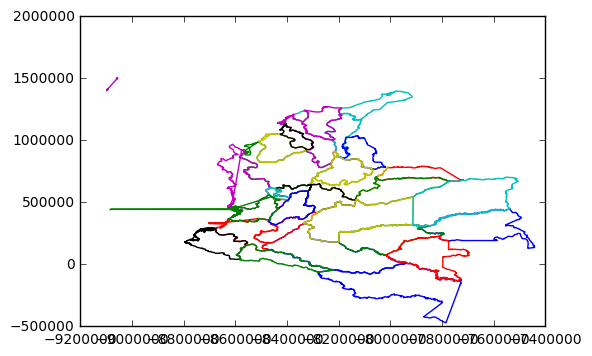

In [35]:
import pylab as plt
%matplotlib inline
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
    
plt.show()

In [14]:
!anaconda search -t conda basemap --platform=linux-64

usage: anaconda [-h] [--show-traceback] [--hide-traceback] [-v] [-q] [--color]
                [--no-color] [-V] [-t TOKEN] [-s SITE]
                ...
anaconda: error: unrecognized arguments: --platform=linux-64


In [ ]:
m = Basemap(projection='mill',
            llcrnrlon=-180. ,llcrnrlat=-60,
            urcrnrlon=180. ,urcrnrlat=80.)

We use a map from a Miller cylindrical projection. We limit the latitude (while keeping the world-wide longitude) because the excluded areas don't have smelters, and so we have more space for the zones where they are present.

# read the shapefile archive
s = m.readshapefile('<location of shapefile>/copper', 'copper')

Reading a shapefile is as simple as calling the readshapefile() function and passing the shapefile location. The additional argument (in this case, copper) is the name of the map attribute that will be created to hold the shapefiles' vertices and features. m.copper will contain the smelters locations in map domain coordinates, while s contains only general information about the Shapefile.

# prepare map coordinate lists for copper smelters locations
x, y = zip(*m.copper)

We prepare a list of coordinates (in the map domain) for the copper smelters locations; zip() receives the m.copper array unpacked (each sublist is passed as a separate parameter to zip()).

# draw coast lines and fill the continents
m.drawcoastlines()
m.fillcontinents()

We draw the coast lines and fill the continents

# draw a blue dot at smelters location
plt.plot(x, y, 'b.')


In [4]:
import geopandas as gpd


ImportError: libgeos-3.5.0.so: cannot open shared object file: No such file or directory